# Bank Customer Churn Prediction

## Predicting customer churn in banking industry using machine learning.

### loading the dataset from kaggle

In [39]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [40]:
import kagglehub

path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /Users/aqsa/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1


In [41]:
import os

dataset_path = "/Users/aqsa/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1"
files = os.listdir(dataset_path)

print("Dataset files:", files)

Dataset files: ['Churn_Modelling.csv']


In [42]:
import pandas as pd
import os

dataset_path = "/Users/aqsa/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1"
file_path = os.path.join(dataset_path, "Churn_Modelling.csv")

df = pd.read_csv(file_path)

print(df.head(2))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1        1.0             1.0   
1       1  83807.86              1        0.0             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  


## Exploratory Data Analysis

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

feature data taken from the kaggle website: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [44]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [45]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [46]:
df.duplicated().sum() 

2

In [47]:
df = df.drop_duplicates()

In [48]:
df.duplicated().sum() 

0

In [49]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
df.shape

(10000, 14)

In [51]:
df = df.dropna()

In [52]:
df.shape

(9996, 14)

In [53]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('eda_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Remove unnecessary columns

In [54]:
df = df.drop(['CustomerId', 'Surname'], axis=1)

In [55]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### Encode Categorical Variables

In [56]:
df = pd.get_dummies(df, columns=['Geography'])

In [57]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [58]:
df.head(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,True,False,False
1,2,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True


### Normalize Numerical Features

To make the model work efficiently, I will scale the numerical features (like Credit Score, Age, Balance, and EstimatedSalary) so that they have a similar scale. This helps the neural network converge faster during training. Gradient Descent (the optimization method used by neural networks) performs better when the features are on a similar scale.

The Min-Max Scaling method rescales values to a range between 0 and 1 and is implemented by using  Scikit-learn’s MinMaxScaler:

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']] = minmax_scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']])

In [60]:
df.head(5)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,0.538,1,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1,True,False,False
1,2,0.516,1,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0,False,False,True
2,3,0.304,1,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1,True,False,False
3,4,0.698,1,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0,True,False,False
5,6,0.590,0,0.351351,0.8,0.453394,2,1.0,0.0,0.748797,1,False,False,True


In [63]:
df = df.drop(columns = 'RowNumber')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9996 non-null   float64
 1   Gender             9996 non-null   int64  
 2   Age                9996 non-null   float64
 3   Tenure             9996 non-null   float64
 4   Balance            9996 non-null   float64
 5   NumOfProducts      9996 non-null   int64  
 6   HasCrCard          9996 non-null   float64
 7   IsActiveMember     9996 non-null   float64
 8   EstimatedSalary    9996 non-null   float64
 9   Exited             9996 non-null   int64  
 10  Geography_France   9996 non-null   bool   
 11  Geography_Germany  9996 non-null   bool   
 12  Geography_Spain    9996 non-null   bool   
dtypes: bool(3), float64(7), int64(3)
memory usage: 888.3 KB


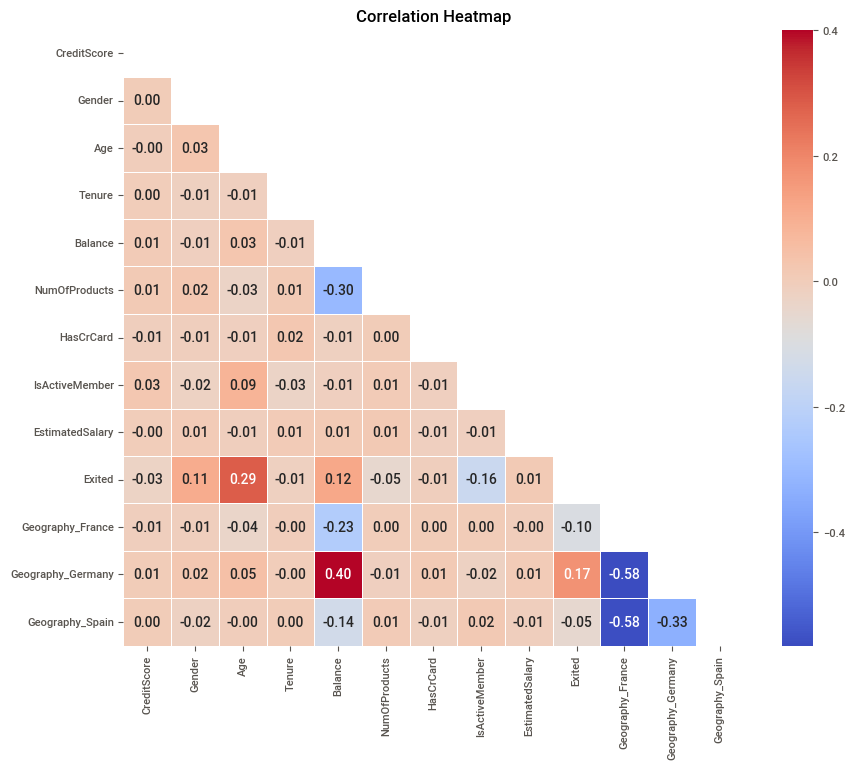

In [71]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [67]:
report = sv.analyze(df)
report.show_html('eda_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_703/583768168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')  # Replace df with your DataFrame


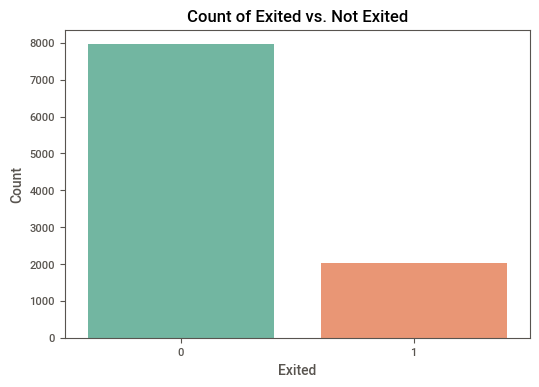

In [73]:
plt.figure(figsize=(6, 4))  
sns.countplot(x='Exited', data=df, palette='Set2')  
plt.title('Count of Exited vs. Not Exited')  
plt.xlabel('Exited')  
plt.ylabel('Count') 
plt.show()

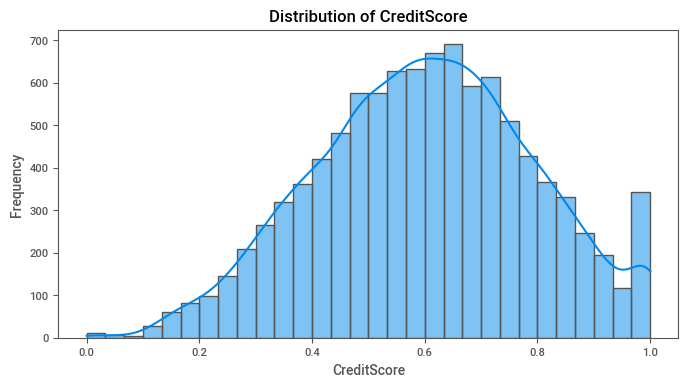

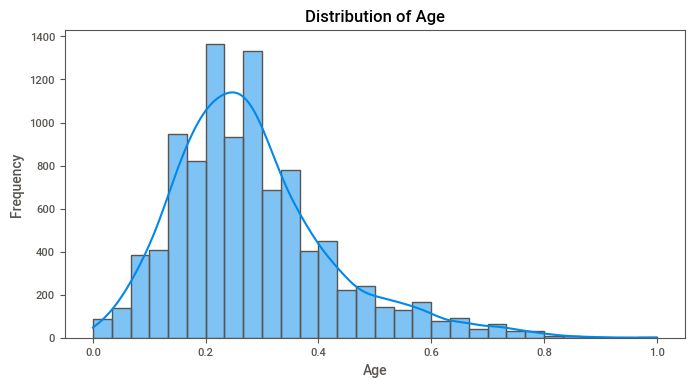

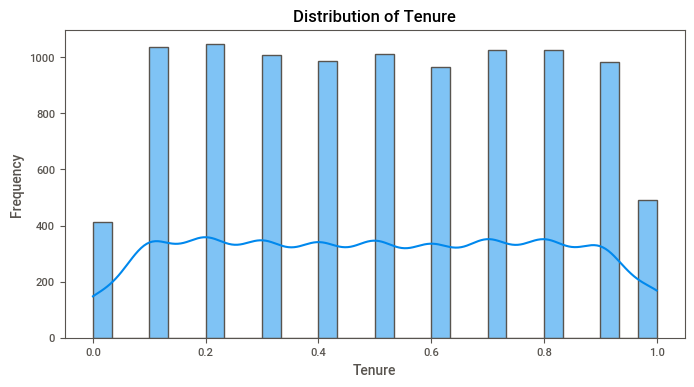

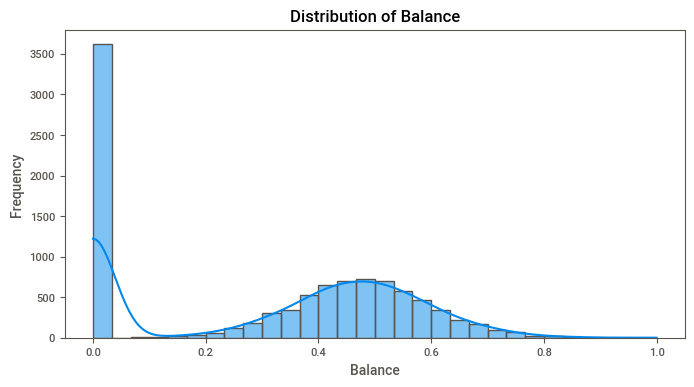

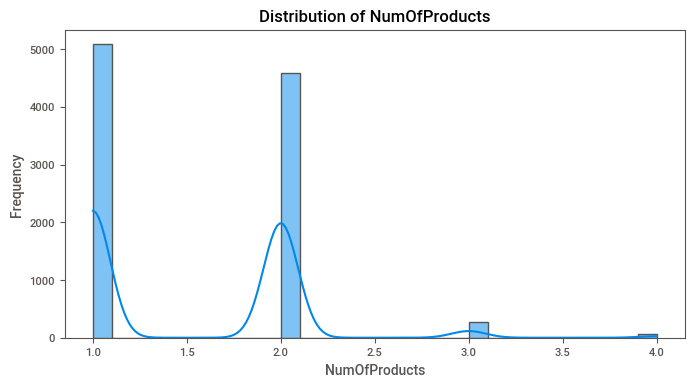

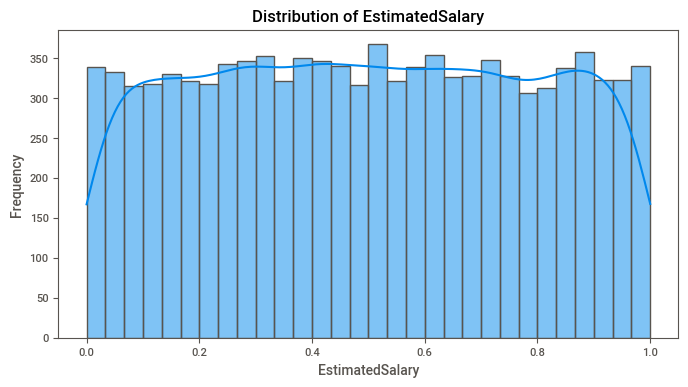

In [75]:
# List of numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

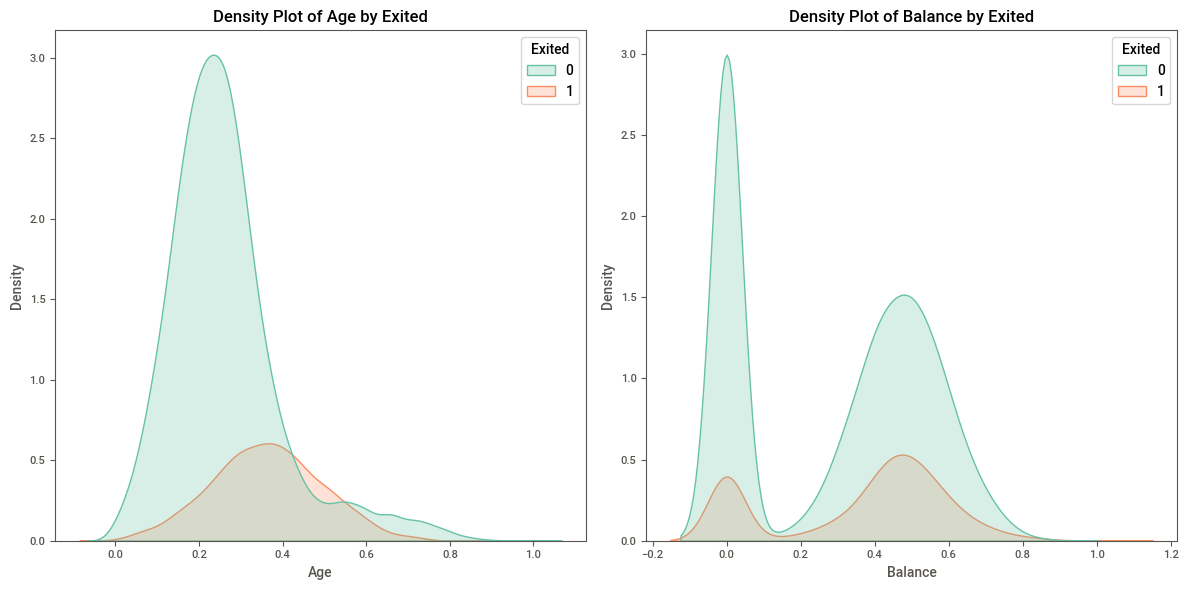

In [80]:
# Create density plots for Age and Balance, color-coded by 'Exited'
plt.figure(figsize=(12, 6))

# Density plot for Age
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, palette='Set2')
plt.title('Density Plot of Age by Exited')

# Density plot for Balance
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Balance', hue='Exited', fill=True, palette='Set2')
plt.title('Density Plot of Balance by Exited')

plt.tight_layout()
plt.show()

/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_703/3114630236.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_703/3114630236.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_703/3114630236.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
/var/folders/f3/9rjb9s3d5095pp6w66

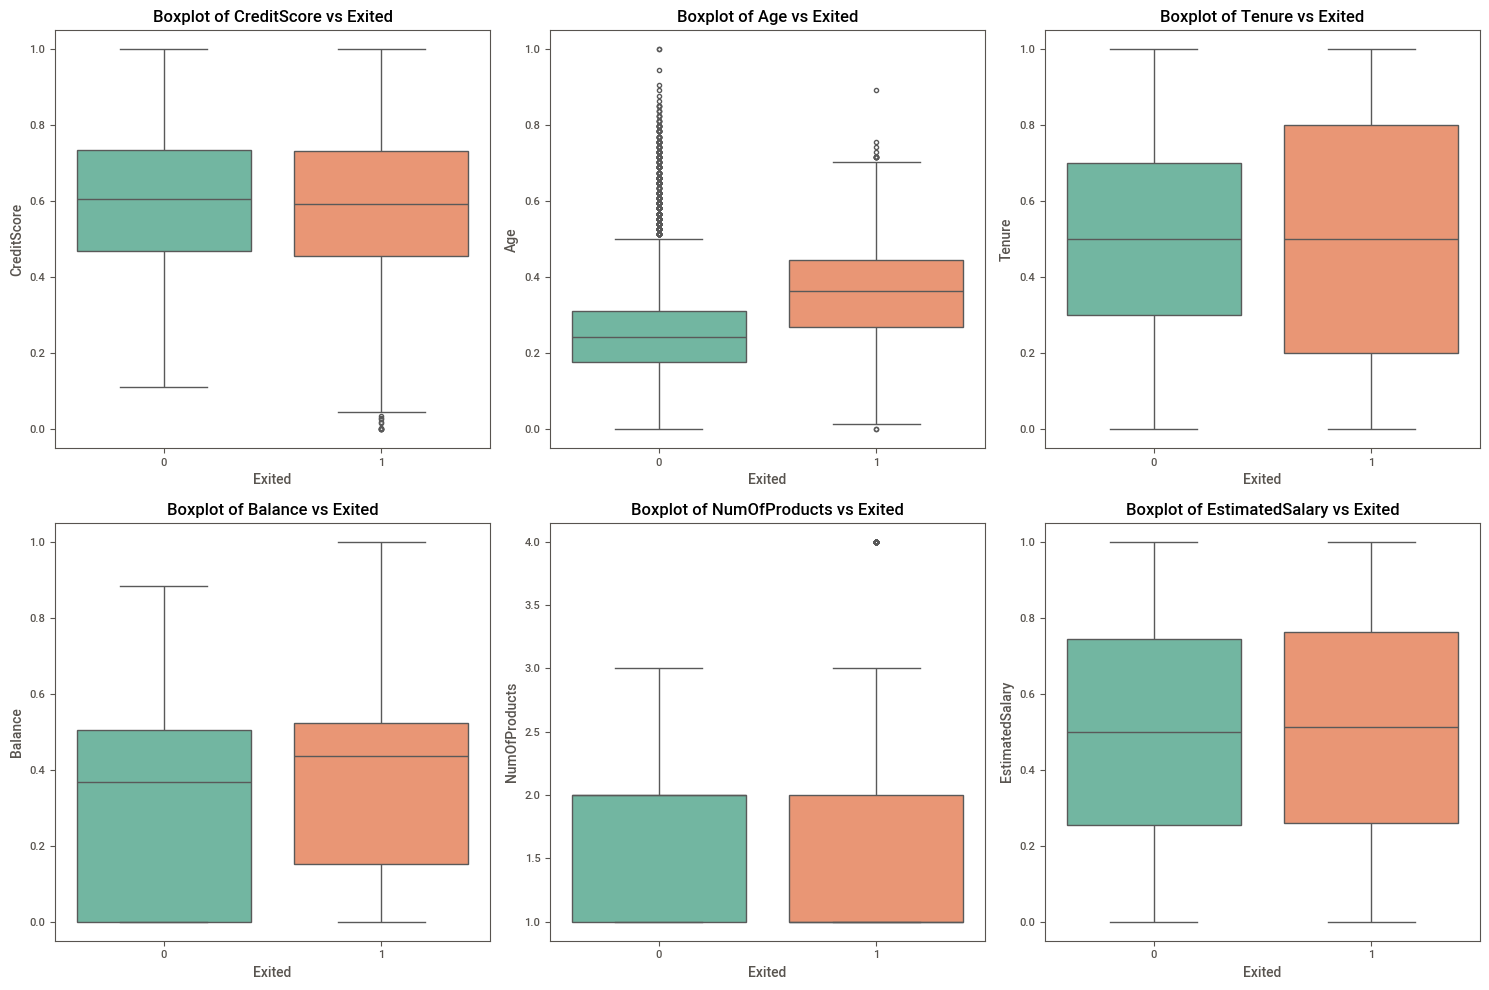

In [82]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange boxplots in 2 rows, 3 columns
    sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col} vs Exited')

plt.tight_layout()
plt.show()

## Split Data into Training & Testing Sets - imbalanced data

In [83]:
df.Exited.value_counts()

Exited
0    7959
1    2037
Name: count, dtype: int64

In [84]:
df.to_csv('/Users/aqsa/Desktop/churndata.csv')

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Select features and target
X = df.drop(columns=["Exited"])  # Features
y = df["Exited"].values.reshape(-1, 1)  # Target (binary classification)

# Convert boolean columns to integers (True → 1, False → 0)
X = X.astype(float)

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (7996, 12) (7996, 1)
Test Shape: (2000, 12) (2000, 1)


### Implement Backpropagation

In [87]:
import numpy as np

# Sigmoid activation and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize network parameters
input_neurons = X_train.shape[1]  # Number of input features
hidden_neurons = 10  # Hidden layer neurons
output_neurons = 1  # Output neuron (binary classification)

np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons) * 0.01
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons) * 0.01
b2 = np.zeros((1, output_neurons))

# Training parameters
learning_rate = 0.01
epochs = 1000
losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss (binary cross-entropy)
    loss = -np.mean(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2))
    losses.append(loss)

    # Backpropagation
    dA2 = A2 - y_train
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / len(X_train)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_train)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1) / len(X_train)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_train)

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Evaluate on test data
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)
predictions = (A2_test > 0.5).astype(int)

# Accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 0: Loss = 0.6942
Epoch 100: Loss = 0.6316
Epoch 200: Loss = 0.5916
Epoch 300: Loss = 0.5656
Epoch 400: Loss = 0.5483
Epoch 500: Loss = 0.5366
Epoch 600: Loss = 0.5284
Epoch 700: Loss = 0.5226
Epoch 800: Loss = 0.5184
Epoch 900: Loss = 0.5153
Test Accuracy: 79.55%


### Adjusting Learning Rate, # hidden neurons, increasing epoch


Training with Learning Rate = 0.001, Hidden Neurons = 10
Epoch 0: Loss = 0.7253
Epoch 100: Loss = 0.4403
Epoch 200: Loss = 0.4210
Epoch 300: Loss = 0.4066
Epoch 400: Loss = 0.3968
Epoch 500: Loss = 0.3894
Epoch 600: Loss = 0.3834
Epoch 700: Loss = 0.3783
Epoch 800: Loss = 0.3828
Epoch 900: Loss = 0.3774
Epoch 1000: Loss = 0.3728
Epoch 1100: Loss = 0.3687
Epoch 1200: Loss = 0.3651
Epoch 1300: Loss = 0.3619
Epoch 1400: Loss = 0.3592
Epoch 1500: Loss = 0.3570
Epoch 1600: Loss = 0.3551
Epoch 1700: Loss = 0.3535
Epoch 1800: Loss = 0.3522
Epoch 1900: Loss = 0.3511
Test Accuracy: 84.65%

Training with Learning Rate = 0.001, Hidden Neurons = 20
Epoch 0: Loss = 1.4773
Epoch 100: Loss = 0.4520
Epoch 200: Loss = 0.4312
Epoch 300: Loss = 0.4298
Epoch 400: Loss = 0.4196
Epoch 500: Loss = 0.4110
Epoch 600: Loss = 0.4035
Epoch 700: Loss = 0.3965
Epoch 800: Loss = 0.3900
Epoch 900: Loss = 0.3839
Epoch 1000: Loss = 0.3784
Epoch 1100: Loss = 0.3734
Epoch 1200: Loss = 0.3689
Epoch 1300: Loss = 0.3650
Ep

FloatingPointError: underflow encountered in multiply

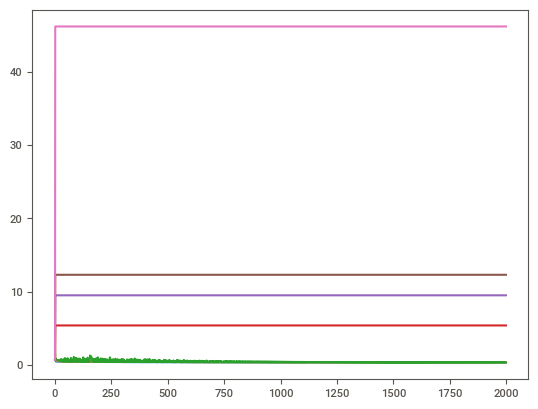

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create and train the model
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, hidden_neurons, epochs):
    np.random.seed(42)  # Set seed for reproducibility

    # Initialize weights and biases
    input_size = X_train.shape[1]
    output_size = 1
    
    # Weights
    W1 = np.random.randn(input_size, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_size)
    b2 = np.zeros((1, output_size))

    # Activation function (Sigmoid) and its derivative
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        return x * (1 - x)

    # Initialize loss tracking
    losses = []

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        Z1 = np.dot(X_train, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)  # Output layer prediction

        # Calculate loss (Binary Cross-Entropy)
        loss = -np.mean(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2))
        losses.append(loss)

        # Backpropagation
        dA2 = A2 - y_train
        dZ2 = dA2 * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(A1)
        dW1 = np.dot(X_train.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases using gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    # Evaluate on test data
    test_output = sigmoid(np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2)
    test_predictions = (test_output >= 0.5).astype(int)  # 0 or 1 predictions
    test_accuracy = np.mean(test_predictions == y_test) * 100
    return losses, test_accuracy

# Experiment with different learning rates, hidden neurons, and epochs
learning_rates = [0.001, 0.01, 0.1]
hidden_neurons_list = [10, 20, 50]
epochs = 2000

for learning_rate in learning_rates:
    for hidden_neurons in hidden_neurons_list:
        print(f"\nTraining with Learning Rate = {learning_rate}, Hidden Neurons = {hidden_neurons}")
        
        # Train the neural network
        losses, test_accuracy = train_neural_network(X_train, y_train, X_test, y_test, learning_rate, hidden_neurons, epochs)
        
        # Plot the training loss
        plt.plot(range(len(losses)), losses, label=f"LR={learning_rate}, Hidden={hidden_neurons} neurons")
        
        # Output the final test accuracy
        print(f"Test Accuracy: {test_accuracy:.2f}%")

# Display the loss plot for all experiments
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs for Different Learning Rates and Hidden Neurons")
plt.legend()
plt.show()


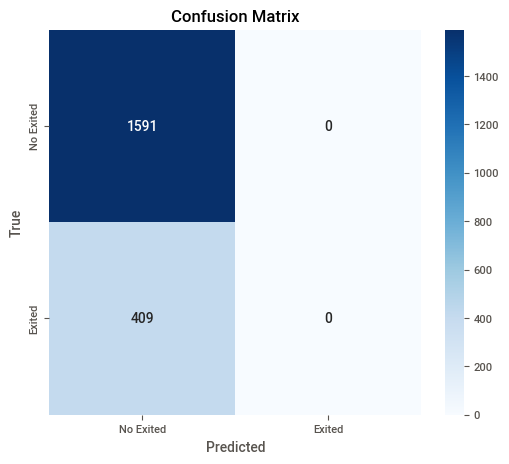

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate model on test set
test_output = sigmoid(np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2)
test_predictions = (test_output >= 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Exited', 'Exited'], yticklabels=['No Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


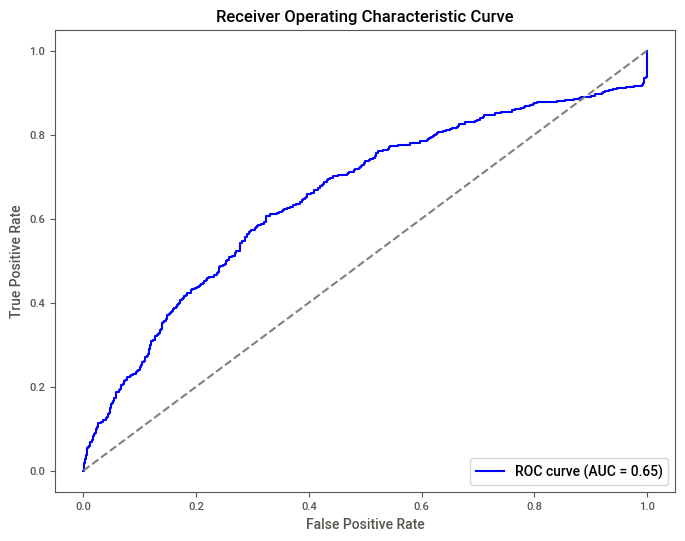

In [94]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, test_output)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()



Training with Learning Rate = 0.001, Hidden Neurons = 10
Epoch 0: Loss = 0.6942
Epoch 100: Loss = 0.4904
Epoch 200: Loss = 0.4678
Epoch 300: Loss = 0.4566
Epoch 400: Loss = 0.4477
Epoch 500: Loss = 0.4390
Epoch 600: Loss = 0.4328
Epoch 700: Loss = 0.4296
Epoch 800: Loss = 0.4282
Epoch 900: Loss = 0.4273
Test Accuracy: 80.75%
Training Time: 4.51 seconds

Training with Learning Rate = 0.001, Hidden Neurons = 20
Epoch 0: Loss = 0.6970
Epoch 100: Loss = 0.4962
Epoch 200: Loss = 0.4761
Epoch 300: Loss = 0.4609
Epoch 400: Loss = 0.4510
Epoch 500: Loss = 0.4407
Epoch 600: Loss = 0.4328
Epoch 700: Loss = 0.4294
Epoch 800: Loss = 0.4254
Epoch 900: Loss = 0.4186
Test Accuracy: 81.55%
Training Time: 11.25 seconds

Training with Learning Rate = 0.01, Hidden Neurons = 10
Epoch 0: Loss = 0.6942
Epoch 100: Loss = 4.2213
Epoch 200: Loss = 4.2213
Epoch 300: Loss = 4.2213
Epoch 400: Loss = 4.2213
Epoch 500: Loss = 4.2213
Epoch 600: Loss = 4.2213
Epoch 700: Loss = 4.2213
Epoch 800: Loss = 4.2213
Epoch 9

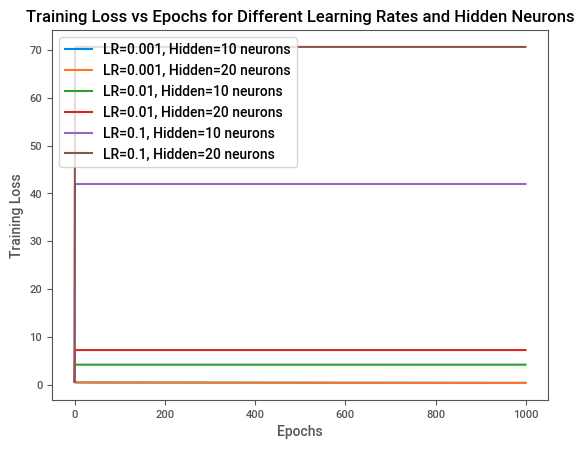

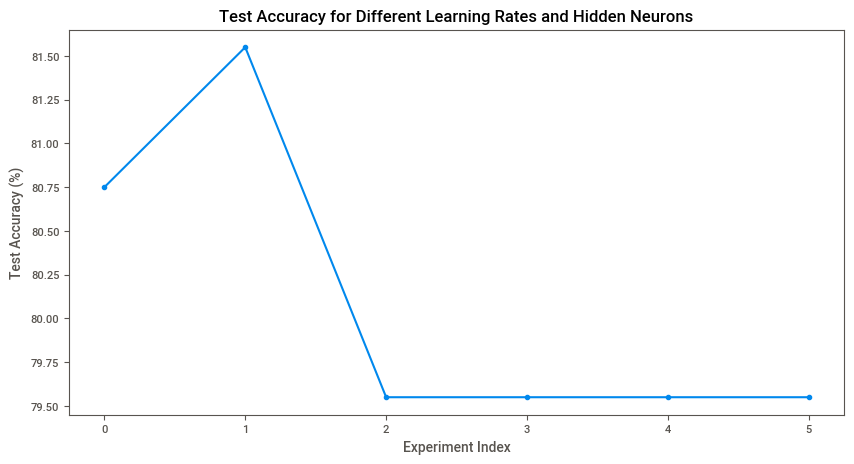

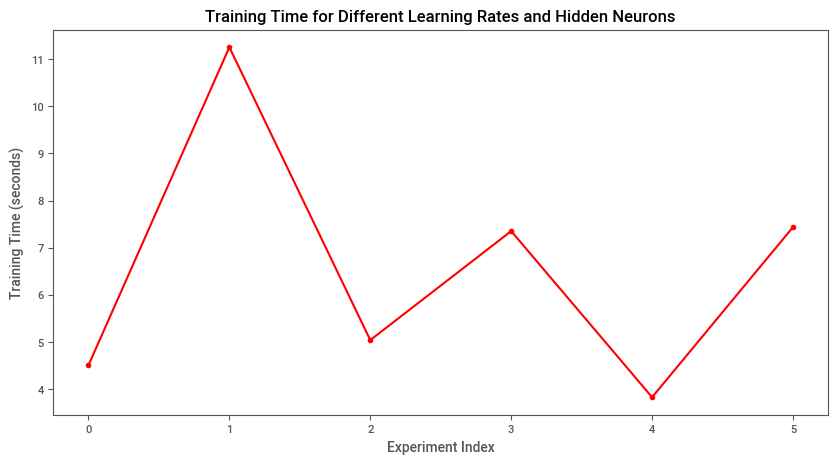

In [97]:
import numpy as np
import pandas as pd
import time  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Selecting my features and target 
X = df.drop(columns=["Exited"])  # Features
y = df["Exited"].values.reshape(-1, 1)  # Target (binary classification for custoomers that have churned or not)

# Convert boolean columns to integers (True → 1, False → 0)
X = X.astype(float)

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid activation and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Function to create and train the model
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, hidden_neurons, epochs):
    np.random.seed(42)  # Set seed for reproducibility

    # Initialize weights and biases
    input_size = X_train.shape[1]
    output_size = 1
    
    # Weights
    W1 = np.random.randn(input_size, hidden_neurons) * 0.01
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    # Activation function (Sigmoid) and its derivative
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        return x * (1 - x)

    # Initialize loss tracking
    losses = []

    # Training loop
    start_time = time.time()  # Start timer to track training time
    for epoch in range(epochs):
        # Forward pass
        Z1 = np.dot(X_train, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)  # Output layer prediction

        # Calculate loss (Binary Cross-Entropy)
        loss = -np.mean(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2))
        losses.append(loss)

        # Backpropagation
        dA2 = A2 - y_train
        dZ2 = dA2 * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(A1)
        dW1 = np.dot(X_train.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases using gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    # Calculate the time taken for training
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate on test data
    test_output = sigmoid(np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2)
    test_predictions = (test_output >= 0.5).astype(int)  # 0 or 1 predictions
    test_accuracy = np.mean(test_predictions == y_test) * 100
    
    return losses, test_accuracy, training_time

# Experiment with different learning rates, hidden neurons, and epochs
learning_rates = [0.001, 0.01, 0.1]
hidden_neurons_list = [10, 20]
epochs = 1000

# Initialize lists to store results for plotting
all_losses = []
all_accuracies = []
all_training_times = []

# Loop through each combination of hyperparameters and train the model
for learning_rate in learning_rates:
    for hidden_neurons in hidden_neurons_list:
        print(f"\nTraining with Learning Rate = {learning_rate}, Hidden Neurons = {hidden_neurons}")
        
        # Train the neural network
        losses, test_accuracy, training_time = train_neural_network(X_train, y_train, X_test, y_test, learning_rate, hidden_neurons, epochs)
        
        # Store results for plotting
        all_losses.append(losses)
        all_accuracies.append(test_accuracy)
        all_training_times.append(training_time)
        
        # Plot the training loss
        plt.plot(range(len(losses)), losses, label=f"LR={learning_rate}, Hidden={hidden_neurons} neurons")
        
        # Output the final test accuracy
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        print(f"Training Time: {training_time:.2f} seconds")

# Display the loss plot for all experiments
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs for Different Learning Rates and Hidden Neurons")
plt.legend()
plt.show()

# Plot the test accuracies
plt.figure(figsize=(10, 5))
plt.plot(all_accuracies, marker='o')
plt.xlabel("Experiment Index")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy for Different Learning Rates and Hidden Neurons")
plt.show()

# Plot the training times
plt.figure(figsize=(10, 5))
plt.plot(all_training_times, marker='o', color='r')
plt.xlabel("Experiment Index")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time for Different Learning Rates and Hidden Neurons")
plt.show()
